In [1]:
%matplotlib inline

# Model Evaluation
based on original documentation
http://scikit-learn.org/stable/modules/model_evaluation.html

## The scoring parameter

In [2]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
import seaborn as sns
from sklearn import datasets, metrics, model_selection, multiclass, preprocessing, svm

plt.rc('font', family='DejaVu Sans') 

In [3]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

failed_list = []
clf = svm.SVC(probability=True, random_state=0)
clf = clf.fit(X, y)
for scoring_type, scoring_function in metrics.SCORERS.items():
    try:
        print('{} =\t\t{}'.format(scoring_type, scoring_function(clf, X, y)))
    except Exception as er:
        print('\t', 'Error of {}:'.format(scoring_type))
        print('\t', er)
        failed_list.append(scoring_type)
    
print('failed_list: [{}]'.format(','.join(failed_list)))

r2 =		0.98
neg_median_absolute_error =		-0.0
neg_mean_absolute_error =		-0.013333333333333334
neg_mean_squared_error =		-0.013333333333333334
median_absolute_error =		-0.0
mean_absolute_error =		-0.013333333333333334
mean_squared_error =		-0.013333333333333334
accuracy =		0.9866666666666667
	 Error of roc_auc:
	 multiclass format is not supported
	 Error of average_precision:
	 multiclass format is not supported
log_loss =		-0.07850721754027946
neg_log_loss =		-0.07850721754027946
adjusted_rand_score =		0.9602776916338867
	 Error of precision:
	 Target is multiclass but average='binary'. Please choose another average setting.
precision_macro =		0.9871794871794872
precision_micro =		0.9866666666666667
	 Error of precision_samples:
	 Sample-based precision, recall, fscore is not meaningful outside multilabel classification. See the accuracy_score instead.
precision_weighted =		0.9871794871794873
	 Error of recall:
	 Target is multiclass but average='binary'. Please choose another average

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method median_absolute_error was renamed to neg_median_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


## Receiver Operating Characteristic (ROC)
based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [4]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = preprocessing.label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.5,
                                                                    random_state=0)

# Learn to predict each class against the other
classifier = multiclass.OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                                    random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

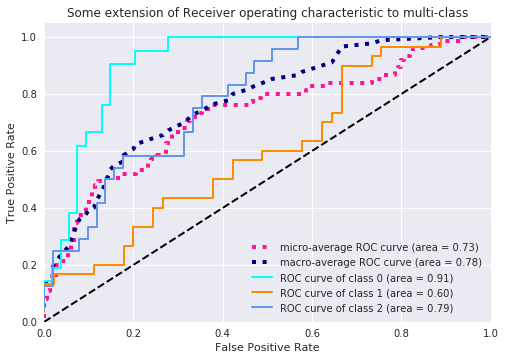

In [5]:
lw = 2
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Probability density functions

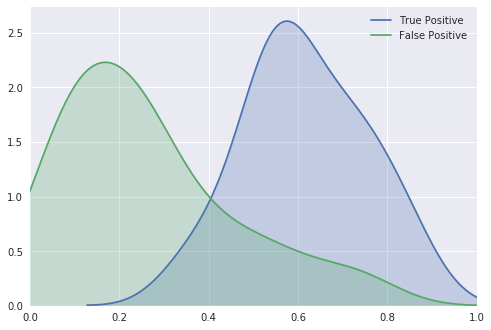

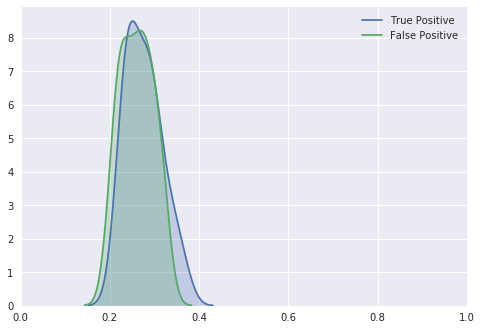

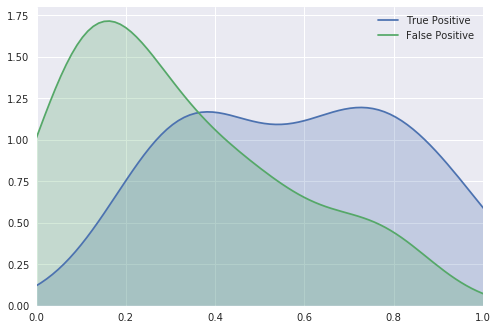

In [6]:
def probability_density_functions(target_feature, classifier, X_test, y_test):
    probability_of_feature = classifier.predict_proba(X_test)[:, target_feature]
    true_feature = np.argmax(y_test, axis=1)
    positive = np.c_[probability_of_feature, true_feature]
    true_positive = positive[positive[:,1] == target_feature][:,0]
    false_positive = positive[positive[:,1] != target_feature][:,0]
    return true_positive, false_positive

def plot_probability_density_functions(tp, fp):
    plt.figure()
    sns.kdeplot(tp, shade=True, label='True Positive')
    sns.kdeplot(fp, shade=True, label='False Positive')
    plt.ylim(ymin=0)
    plt.xlim(0, 1)

tp, fp = probability_density_functions(0, classifier, X_test, y_test)
plot_probability_density_functions(tp, fp)

tp, fp = probability_density_functions(1, classifier, X_test, y_test)
plot_probability_density_functions(tp, fp)

tp, fp = probability_density_functions(2, classifier, X_test, y_test)
plot_probability_density_functions(tp, fp)
